In [1]:
% matplotlib inline

import matplotlib.pyplot as plt
import plotly as ply
import numpy as np
import seaborn as sb
import pandas as pd

from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff

init_notebook_mode(connected=True) 

In [2]:
data = pd.read_csv('marijuana-street-price-clean.csv')

In [3]:
print(data.shape)
data.head()

(22899, 8)


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [4]:
header = ['State', 'High Quality', 'HQ Number', 'Medium Quality', 'MQ Number', 'Low Quality', 'LQ Number', 'Date']
data.columns = header
data.head()

,State,High Quality,HQ Number,Medium Quality,MQ Number,Low Quality,LQ Number,Date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


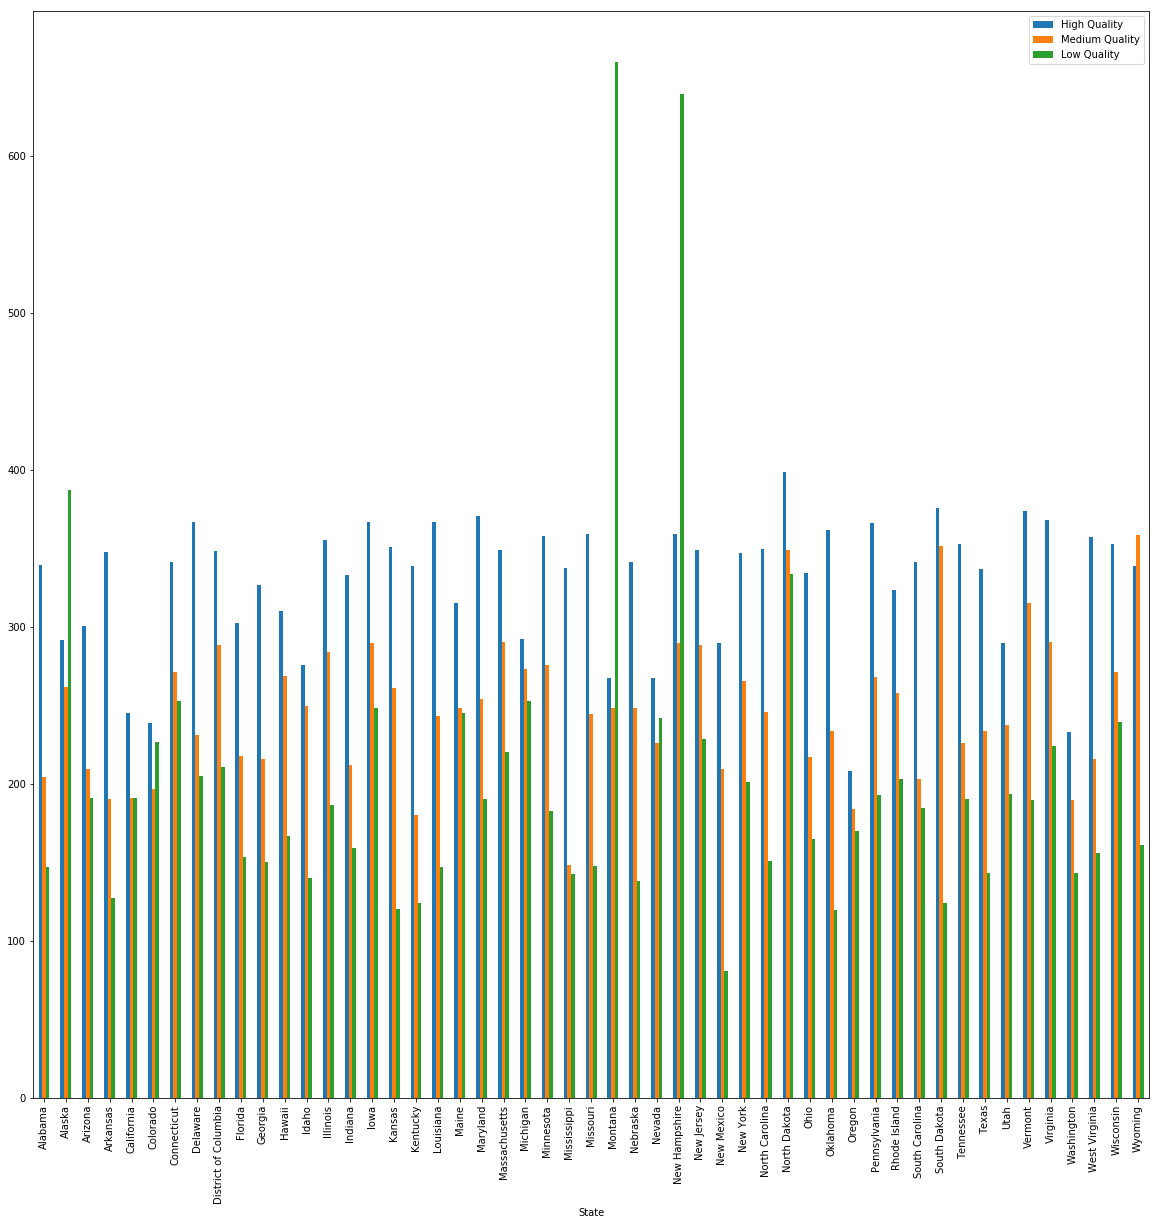

In [5]:
table = data.groupby(['State']).mean()
table[['High Quality', 'Medium Quality', 'Low Quality']].plot.bar(figsize=(20,20))
# flattened = pd.DataFrame(table.to_records())
# flattened.set_index('State', inplace=True)
# print(flattened)

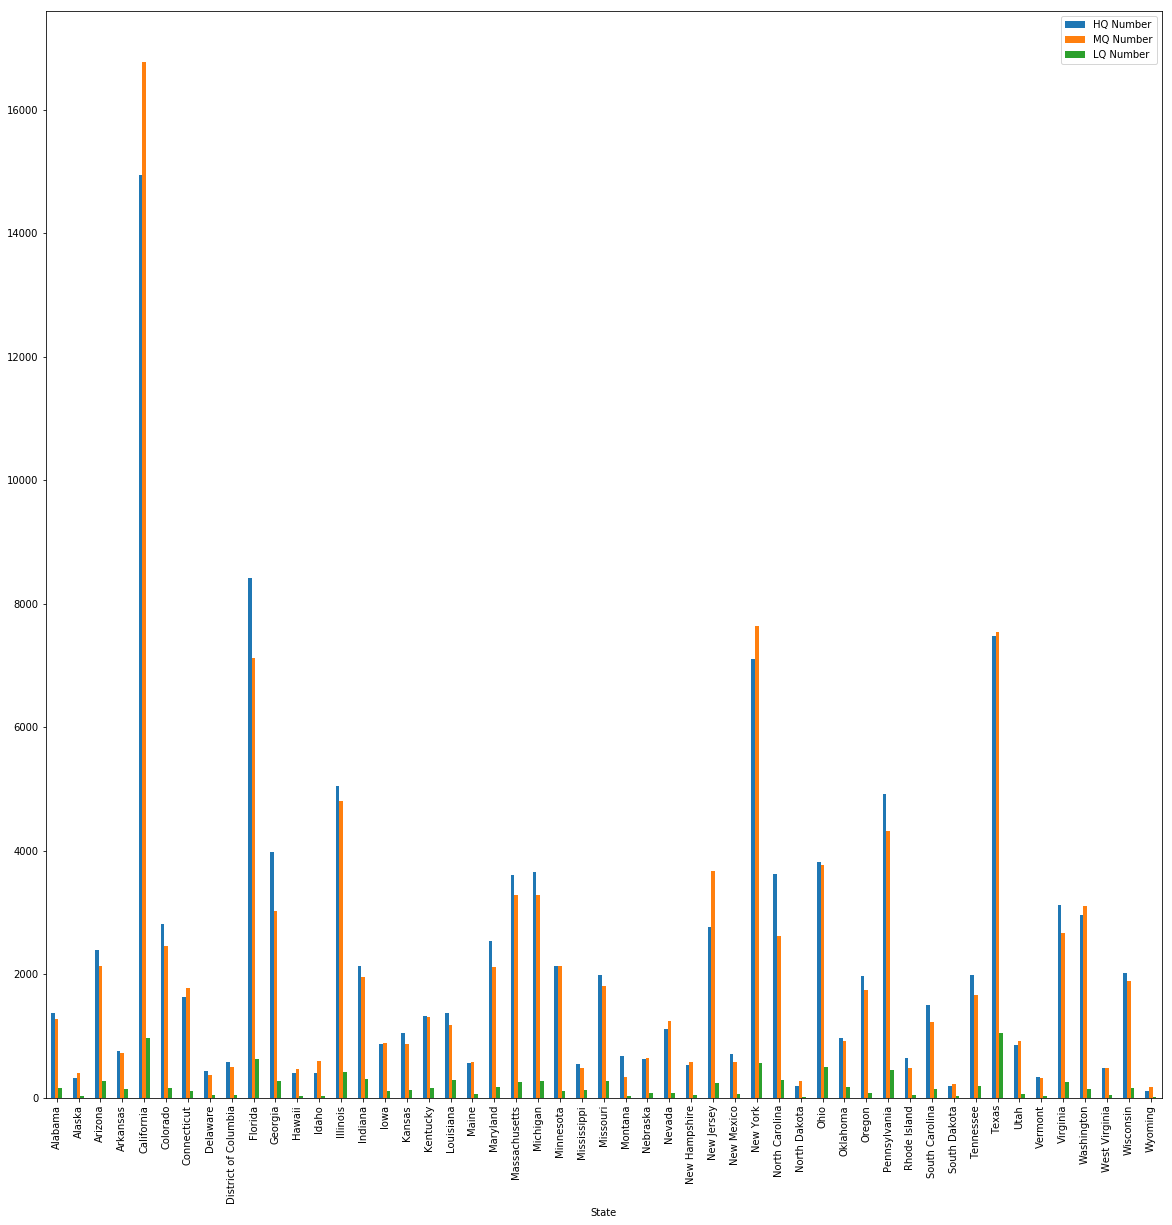

In [6]:
table[['HQ Number', 'MQ Number', 'LQ Number']].plot.bar(figsize=(20,20))

# 'California', 'Florida', 'New York'

In [7]:
type(table)


table['State'] = table.index
type(table['State'][1])

str

In [24]:
import colorlover as cl

colors = cl.scales['5']['seq']['Greens']

colors = [ [i/4, colors[i]] for i in range(5) ]

print(colors)

[[0.0, 'rgb(237,248,233)'], [0.25, 'rgb(186,228,179)'], [0.5, 'rgb(116,196,118)'], [0.75, 'rgb(49,163,84)'], [1.0, 'rgb(0,109,44)']]


In [25]:
table['text'] = table['State'] + '<br>' +\
    'Mean Number Insertions: ' + table['HQ Number'].astype(str)
    

In [39]:
codes = pd.read_csv("USA_codes.csv")
codes = codes[['code', 'state']]
codes.columns = ['code', 'State']
table1 = pd.merge(table, codes, on='State')

print(table1.shape)


table1

(50, 9)


,High Quality,HQ Number,Medium Quality,MQ Number,Low Quality,LQ Number,State,text,code
0,339.561849,1379.414254,204.606169,1270.351893,146.832603,161.149220,Alabama,Alabama<br>Mean Number Insertions: 1379.414253...,AL
1,291.482004,321.244989,262.046392,407.917595,387.232727,32.334076,Alaska,Alaska<br>Mean Number Insertions: 321.24498886...,AK
2,300.667483,2392.465479,209.365345,2137.414254,190.826860,279.006682,Arizona,Arizona<br>Mean Number Insertions: 2392.465478...,AZ
3,348.056147,751.988864,190.414655,724.683742,127.345455,135.902004,Arkansas,Arkansas<br>Mean Number Insertions: 751.988864...,AR
4,245.376125,14947.073497,191.268909,16769.821826,190.795992,976.298441,California,California<br>Mean Number Insertions: 14947.07...,CA
5,238.918708,2816.218263,196.532517,2457.512249,226.790620,165.349666,Colorado,Colorado<br>Mean Number Insertions: 2816.21826...,CO
6,341.694076,1625.120267,271.323898,1777.227171,253.024876,110.229399,Connecticut,Connecticut<br>Mean Number Insertions: 1625.12...,CT
7,366.781849,440.971047,231.230312,372.587973,205.045992,39.175947,Delaware,Delaware<br>Mean Number Insertions: 440.971046...,DE
8,302.570312,8415.031180,217.882561,7127.216036,153.205372,632.077951,Florida,Florida<br>Mean Number Insertions: 8415.031180...,FL
9,326.659644,3975.084633,215.943630,3030.489978,150.264091,278.004454,Georgia,Georgia<br>Mean Number Insertions: 3975.084632...,GA


In [35]:
HQplot = [ dict(
        type='choropleth',
        colorscale = colors,
        autocolorscale = False,
        locations = table1['code'],
        z = table1['High Quality'],
        locationmode = 'USA-states',
        text = table1['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "High Quality Prices")
        ) ]

In [40]:
layout = dict(
        title = '2014 USA High Quality Ganja Prizes',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255,255,255)'),
             )
    
fig = dict( data=HQplot, layout=layout )

In [41]:
ply.offline.iplot(fig, image='jpeg')

In [42]:
MQplot = [ dict(
        type='choropleth',
        colorscale = colors,
        autocolorscale = False,
        locations = table1['code'],
        z = table1['Medium Quality'],
        locationmode = 'USA-states',
        text = table1['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Medium Quality Price")
        ) ]


layout = dict(
        title = '2014 USA Medium Quality Ganja Prizes',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255,255,255)'),
             )

In [43]:
fig = dict( data=MQplot, layout=layout )
ply.offline.iplot(fig, image='jpeg')

In [44]:
LQplot = [ dict(
        type='choropleth',
        colorscale = colors,
        autocolorscale = False,
        locations = table1['code'],
        z = table1['Low Quality'],
        locationmode = 'USA-states',
        text = table1['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Medium Quality Price")
        ) ]


layout = dict(
        title = '2014 USA Medium Quality Ganja Prizes',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255,255,255)'),
             )

fig = dict( data=LQplot, layout=layout )
ply.offline.iplot(fig, image='jpeg')